In [3]:
import pandas as pd 

df = pd.read_csv("ai_job_dataset1.csv")
df.head()

,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,Data Scientist,219728,USD,219728,EX,PT,Sweden,M,Sweden,0,"Python, Computer Vision, R, Docker",Associate,13,Transportation,2024-09-23,2024-10-31,1132,6.6,TechCorp Inc
1,AI00002,Head of AI,230237,JPY,25326070,EX,PT,Japan,L,Japan,50,"Kubernetes, MLOps, Tableau, Python",Bachelor,10,Transportation,2024-07-26,2024-09-12,2299,8.5,Cloud AI Solutions
2,AI00003,Data Engineer,128890,EUR,109557,EX,CT,Germany,S,Germany,100,"Spark, Scala, Hadoop, PyTorch, GCP",Bachelor,12,Automotive,2025-01-19,2025-03-28,1329,5.5,Quantum Computing Inc
3,AI00004,Computer Vision Engineer,96349,USD,96349,MI,FL,Finland,L,Finland,50,"MLOps, Linux, Tableau, Python",PhD,2,Automotive,2024-07-20,2024-09-06,1132,6.8,Cognitive Computing
4,AI00005,Robotics Engineer,63065,EUR,53605,EN,FT,France,S,France,100,"R, Scala, SQL, GCP, Python",Associate,0,Finance,2025-03-16,2025-05-09,2011,9.3,Advanced Robotics


Text(0, 0.5, 'Frequency')

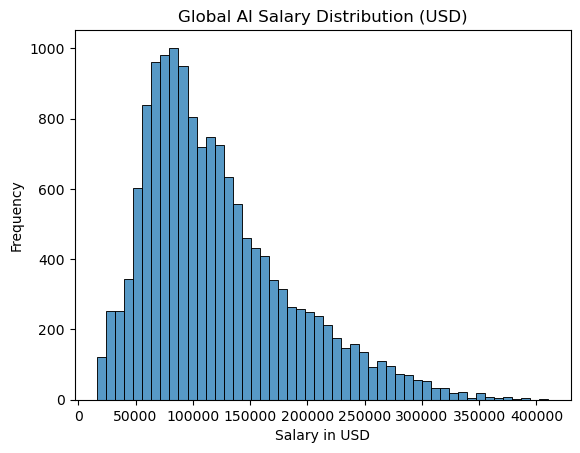

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['salary_usd'], bins=50)
plt.title("Global AI Salary Distribution (USD)")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")

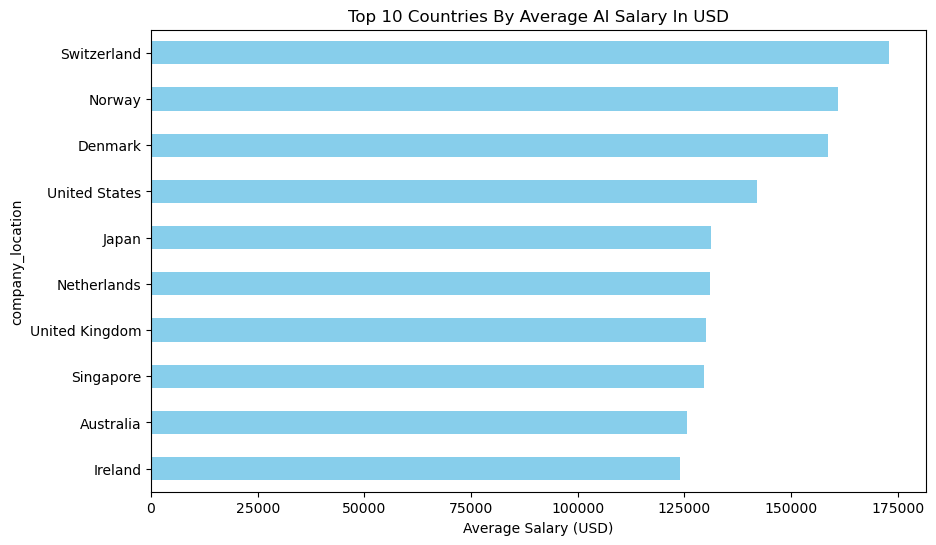

In [17]:
top_countries = (
                 df.groupby('company_location')['salary_usd']
                 .mean()
                 .sort_values(ascending=False)
                 .head(10)
)

top_countries.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Countries By Average AI Salary In USD")
plt.xlabel("Average Salary (USD)")
plt.gca().invert_yaxis()

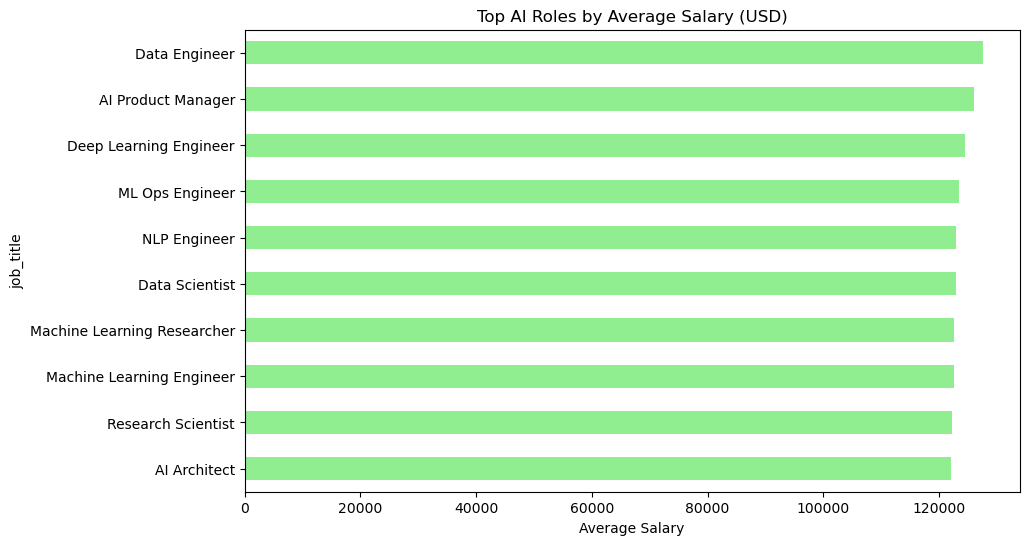

In [20]:
job_salary = (
              df.groupby('job_title')['salary_usd']
              .mean()
              .sort_values(ascending=False)
              .head(10)
)

job_salary.plot(kind='barh', figsize=(10, 6), color='lightgreen')
plt.title("Top AI Roles by Average Salary (USD)")
plt.xlabel("Average Salary")
plt.gca().invert_yaxis()

Text(0.5, 1.0, 'Salary Spread by Job Title')

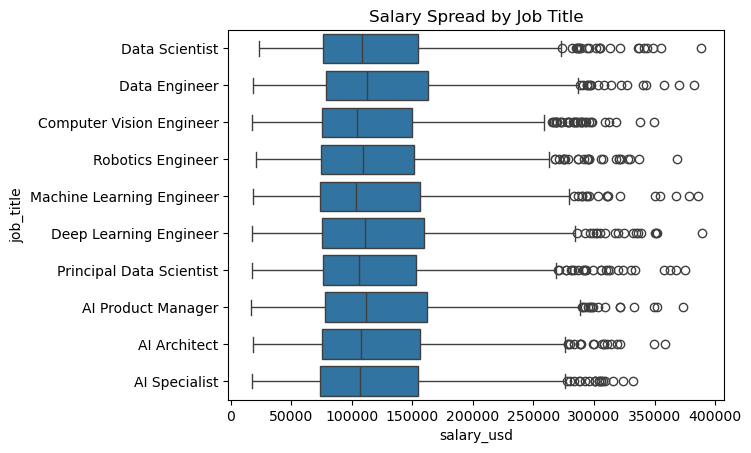

In [22]:
top_roles = df['job_title'].value_counts().head(10).index
sns.boxplot(data=df[df['job_title'].isin(top_roles)],
            x='salary_usd', y='job_title')
plt.title("Salary Spread by Job Title")

Text(0, 0.5, 'Salary in USD')

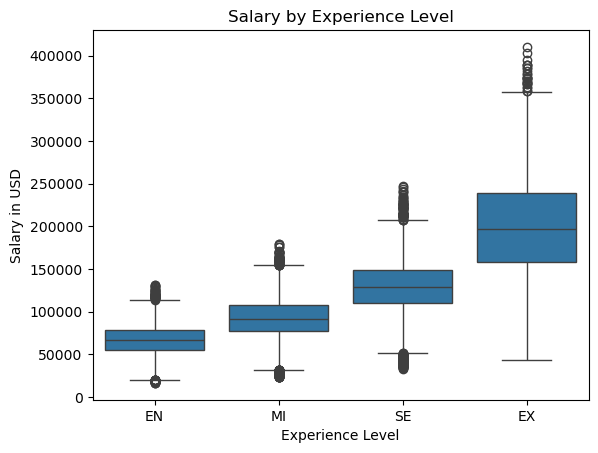

In [29]:
order = ['EN', 'MI', 'SE', 'EX']

sns.boxplot(x='experience_level', y='salary_usd', data=df, order=order)
plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")

In [7]:
def classify_remote(row):
             if row == 100 :
                 return 'remote'
             elif row == 0 :
                 return 'onsite'
             else :
                 return 'hybrid'
         
df['remote_work_type'] = df['remote_ratio'].apply(classify_remote)

In [8]:
df['remote_work_type'].value_counts()

remote_work_type
remote    5034
hybrid    4991
onsite    4975
Name: count, dtype: int64

remote_work_type
hybrid    122260.912643
onsite    121581.708744
remote    122130.682956
Name: salary_usd, dtype: float64

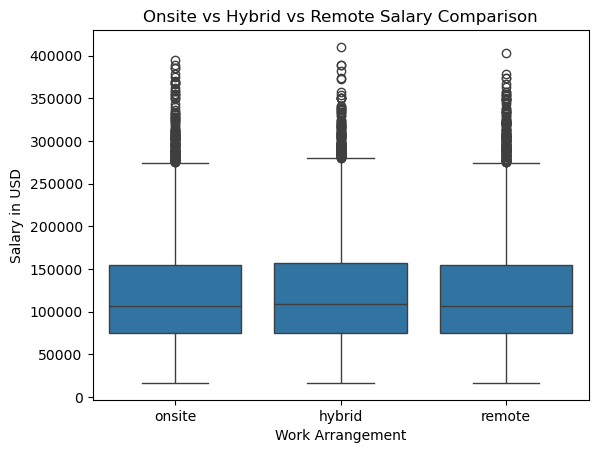

In [12]:
sns.boxplot(x='remote_work_type', y='salary_usd', data=df)
plt.title("Onsite vs Hybrid vs Remote Salary Comparison")
plt.xlabel("Work Arrangement")
plt.ylabel("Salary in USD")

df.groupby('remote_work_type')['salary_usd'].mean()

Text(0, 0.5, 'Salary in USD')

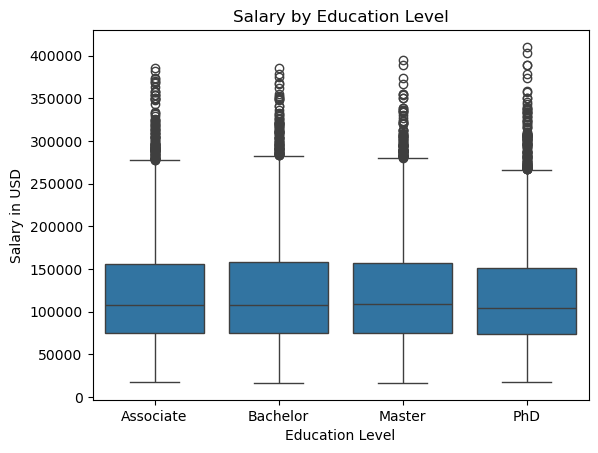

In [20]:
order = ['Associate', 'Bachelor', 'Master', 'PhD']

sns.boxplot(x='education_required', y='salary_usd', data=df, order=order)
plt.title("Salary by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Salary in USD")

Text(0, 0.5, 'Salary in USD')

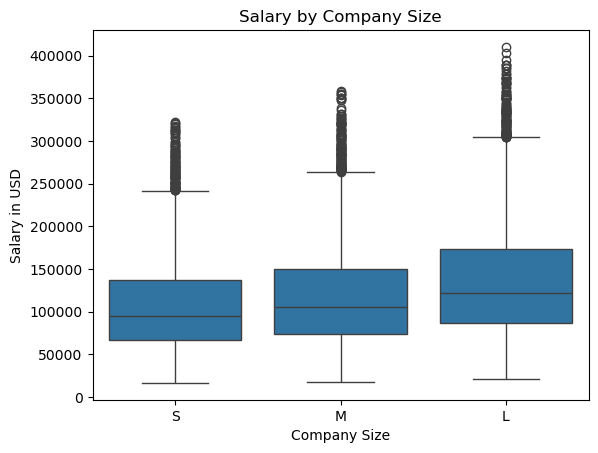

In [21]:
order = ['S', 'M', 'L']

sns.boxplot(x='company_size', y='salary_usd', data=df, order=order)
plt.title("Salary by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Salary in USD")

Text(0.5, 1.0, 'Correlation Matrix')

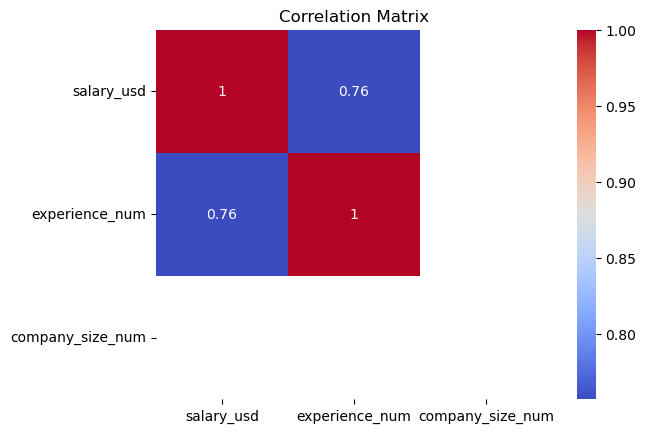

In [22]:
#Example of Mapping

exp_map = {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
size_map = {'small': 0, 'medium': 1, 'large': 2}

df['experience_num'] = df['experience_level'].map(exp_map)
df['company_size_num'] = df['company_size'].map(size_map)

#Heatmap
sns.heatmap(df[['salary_usd', 'experience_num', 'company_size_num']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")

In [24]:
plt.savefig("salary_by_country.png", bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [ ]:
import plotly.express as px

fig = px.box(df, x='remote_work_type', y='salary_usd', title='Onsite vs Hybrid vs Remote Salaries')
fig.write_html("remote_salary_plot.html")